<a href="https://colab.research.google.com/github/vkjadon/python/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Test Methods

In [73]:
def test_datatype(input,expected):
    try:
        assert isinstance(input, expected)
        print("Datatype Test Case Passed")
    except:
        print("X should be a Numpy Array")

def test_shape(input, expected):
    try:
        assert input.shape == expected
        print("Shape Test Case Passed")
    except:
        print(f"Check the Shape!!")
        print(f"The shape should be ({expected[0]},{expected[1]})")

def test_linear(target):
    X = np.array([[1.0],[1.5]])
    w = np.array([[2.0], [1.0]])
    b = -0.5

    pred = target(X, w, b)

    assert type(pred) == np.ndarray, f"Wrong type for pred. {type(pred)} != np.ndarray"
    assert pred.shape == (1, X.shape[1]), f"Wrong shape for pred. {pred.shape} != {(1, X.shape[1])}"
    assert np.allclose(pred, [[3.0]]), f"Wrong values for pred. {pred} != [[3.0]]"

    print('\033[92mAll tests passed!')

## Import Section

In [74]:
# Import the NumPy library
import numpy as np
import matplotlib.pyplot as plt

## Input Data



| Size      | Bedrooms | Price (L) |
| :---:     | :----:   |   :---:   |
| 100       | 1        | 20        |
| 150       | 2        | 28        |
| 200       | 3        | 39        |
| 250       | 4        | 51        |
| 500       | 4        | 80        |

### Features and Training Examples

$m=5; nx=2$

In [75]:
nx=2; m=5

### Features for $3^{rd}$ training example:

$x^{(3)}_1=200; x^{(3)}_2=3$

### Features vector for $2^{nd}$ training example:


$\mathbf{x}^{(2)} =\begin{pmatrix}
  150 \\ 2
 \end{pmatrix} $

### Feature vector of the problem dataset:

$ \mathbf{X} = \begin{pmatrix}
\mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \cdots & \mathbf{x}^{(5)}
\end{pmatrix}$

$ \mathbf{X} = \begin{pmatrix}
100 & 150 & 200 & 250 & 500 \\ 1 & 2 & 3 & 4 & 4
\end{pmatrix}$

### Output vector of the problem dataset:

$ \mathbf{y} = \begin{pmatrix}
\mathbf{y}^{(1)} & \mathbf{y}^{(2)} & \cdots & \mathbf{y}^{(5)}
\end{pmatrix}$

##Implimentation

In [76]:
x1=[100,1]
x2=[150,2]
x3=[200,3]
x4=[250,4]
x5=[500,4]

In [77]:
# Create Feature Matrix
# X=(x1, x2, ....)
X=np.array([x1, x2, x3, x4, x5]).T
# print(X, X.shape, type(X), "\n", X[1][4])

In [78]:
expected=np.ndarray
test_datatype(X,expected)
# expected=np.arange(10).reshape(nx,m).shape
expected=(2,5)
test_shape(X,expected)

Datatype Test Case Passed
Shape Test Case Passed


In [79]:
y1=[20]
y2=[28]
y3=[39]
y4=[51]
y5=[80]

In [80]:
# Create Feature Matrix
#y=(y1, y2, ...)
y=np.array([y1, y2, y3, y4, y5]).T

In [81]:
expected=(1,5)
test_shape(y,expected)

Shape Test Case Passed


In [82]:
#Initialize Weights and Biases
# Initialize with any random number between 0-1
#The desired shape - w(nx,1); b(1,1)
w=np.random.rand(nx).reshape(nx,1)
b=np.random.rand(1).reshape(1,1)

In [83]:
expected=(nx,1)
test_shape(w,expected)

Shape Test Case Passed


In [84]:
expected=(1,1)
test_shape(b,expected)

Shape Test Case Passed


### Normalization

$$ \bar{\bf{X}}= \frac{\bf{X}}{x_{max}}$$

In [85]:
print(X)
#np.max(X, axis=1)
np.max(X, axis=1, keepdims=True)

[[100 150 200 250 500]
 [  1   2   3   4   4]]


array([[500],
       [  4]])

In [86]:
#X_norm=X/max(X)
X_norm=X/np.max(X, axis=1, keepdims=True)
print(X_norm)

[[0.2  0.3  0.4  0.5  1.  ]
 [0.25 0.5  0.75 1.   1.  ]]


## Functions

### Linear Function

The linear model in vectorize form is

$\hat{\mathbf{y}} = \mathbf{w^T X+b}$

In [87]:
def linear(X,w,b):
  return np.dot(w.T,X)+b

In [70]:
# y=linear(np.array([[1.0], [1.5]]), np.array([[2.0], [1.0]]), -0.5)
# y=linear(np.array([[1., 1.5], [2, 1]]), np.array([[0.3], [0.5]]), -0.5)
# print(y)

test_linear(linear)

All tests passed!


In [88]:
yhat=linear(X_norm,w,b)
print(yhat)

[[0.92033786 0.97120569 1.02207352 1.07294134 1.1698365 ]]


### Calculate Cost

the objective function for this minimization problem can be formulated as below

 $J(w,b)=\frac{1}{2m}\sum \limits _{i=1} ^{m} (\hat{y}-y)^{2} $

In [90]:
error=np.subtract(yhat,y)
error_squared=np.power(error,2)
J=np.sum(error_squared, axis=1)

### Cost Derivative - dw

$ \frac{\partial J}{\partial w} = \frac{1}{m} \mathbf{X}(\mathbf{\hat {y}-y})^T$

### Cost Derivatives - db

$ \frac{\partial J}{\partial b} = \frac{1}{m} Sum(\mathbf{\hat {y}-y})^T$





### Update the weight and bias

$\mathbf{w} := \mathbf{w} - \alpha \frac {\partial{\mathbf{J}}}{\partial {\mathbf{w}}}$

$ {\mathbf{b}} := {\mathbf{b}} - \alpha \frac {\partial {\mathbf{J}}}{\partial {\mathbf{b}}}$

The output weight can be converted using the following analysis.
$$ \bar{w}=\frac {dy}{d\bar{X}} = \frac {dy}{\frac{dX}{X_{max}}}$$
$$  w' = \frac {dy{X_{max}}}{dX} = w X_{max}$$
$$  w = \frac {w'}{X_{max}}$$

In [72]:
learning_rate=0.01
max_iteration=5000
cost=np.zeros((max_iteration))
#print(X_norm)
w=np.zeros(nx).reshape(nx,1)
b=np.zeros(1).reshape(1,1)
for i in range(max_iteration):
  yhat=linear(X_norm,w,b)
  #print("y_hat = ", yhat.shape)
  error=np.subtract(yhat,y)
  #print(error, error.shape)
  error_squared=np.power(error,2)
  #J=np.sum(error_squared, axis=1)
  #J=np.sum(np.multiply((yhat-y), (yhat-y)), axis=1)
  J=np.dot((yhat-y), (yhat-y).T)
  cost[i]=J/(2*m) # All three implementation will work
  #print(cost[i])
  #dw_sum=np.sum(X_norm*(yhat-y),axis=1)
  #print("dw_sum ", dw_sum)
  #dw=dw_sum/m
  dw=(1/m)*np.dot(X_norm,(yhat-y).T)
  db=(1/m)*np.sum((yhat-y), axis=1)
  w=w-learning_rate*dw
  b=b-learning_rate*db
  #print(b.shape)
print(w, b)

ValueError: operands could not be broadcast together with shapes (1,5) (1,2) 

(5000,) (5000,)


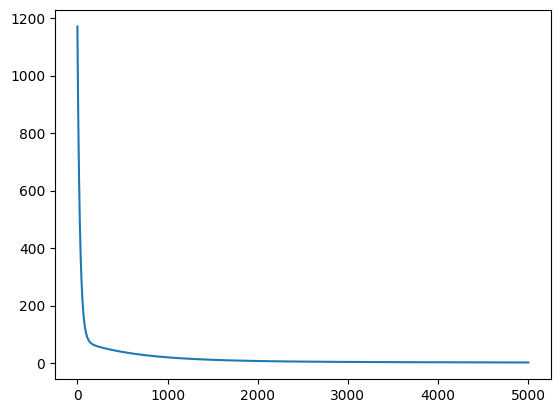

In [ ]:
xPlot=np.linspace(1,max_iteration, num=max_iteration)
print(xPlot.shape, cost.shape)
plt.plot(xPlot, cost)